# GUIA 1
### Facundo L. Sanchez

In [2]:
import numpy as np
from scipy.special import hyp1f1
from scipy import integrate
from scipy.sparse import spdiags
from scipy.sparse.linalg import eigs
from numpy.linalg import eigh
import matplotlib.pyplot as plt
import time as tm
from math import factorial

from __future__ import division

%matplotlib inline

# Defino la funcion de onda radial

In [3]:
def R1F1(n,l,z,r):
    rho = 2 * r * z / n
    rnum = (2 * z / n)**3 * factorial(n + l)
    rden = (factorial(2*l+1))**2 * 2*n * factorial(n-l-1)
    rnorm = np.sqrt(rnum/rden)
    rfunc = (rho)**l * np.exp(-rho/2) * hyp1f1(-n+l+1, 2*l+2, rho)
    R = rnorm * rfunc
    return R

# Defino los vectores para el plot

In [3]:
nlen = 500
rmax = 10.0
rmin = 0.0
r = np.linspace(rmin,rmax,nlen)

# Plot para n = 1, l = 0, Z = 4

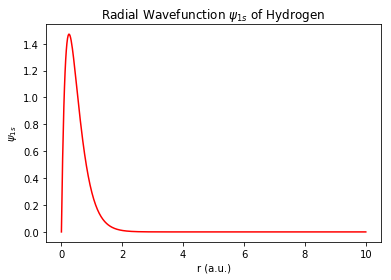

In [4]:
psi_1 = R1F1(1,0,4,r)
plt.plot(r, r*psi_1,'r')
plt.title("Radial Wavefunction $\psi_{1s}$ of Hydrogen")
plt.xlabel("r (a.u.)")
plt.ylabel("$\psi_{1s}$")
plt.show()

# Plot para n = 2, l = 1, Z = 4

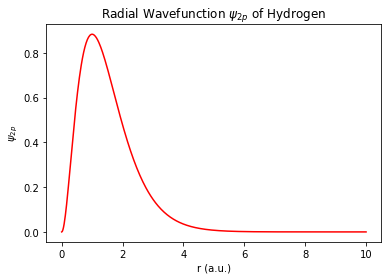

In [5]:
psi_2 = R1F1(2,1,4,r)
plt.plot(r, r*psi_2,'r')
plt.title("Radial Wavefunction $\psi_{2p}$ of Hydrogen")
plt.xlabel("r (a.u.)")
plt.ylabel("$\psi_{2p}$")
plt.show()

# Chequeo ortonormalidad

In [6]:
integrate.quad(lambda r:(r**2*R1F1(1,0,4,r)*R1F1(3,0,4,r)), 0, float('inf'))

(3.92420099595802e-17, 2.438453634748002e-10)

- La parte radial no es ortogonal porque estoy en distintos $l$, lo que es ortogonal con diferentes $l$ es la parte angular (armonicos Esfericos)

In [7]:
integrate.quad(lambda r:(r**2*R1F1(2,1,4,r)**2), 0, float('inf'))

(0.9999999999999999, 1.3877796942138986e-08)

In [8]:
integrate.quad(lambda r:(r**2*R1F1(1,0,4,r)**2), 0, float('inf'))

(1.0, 1.2956640677365438e-08)

- Las funciones estan normalizadas

# Calculo $<r^k>, k = [-3,3]$ ^ $k \neq 0$

In [9]:
rMean_1s = []
rMean_2p = []
exponents_list = [exp for exp in range(-3,4) if exp is not 0]

for i in exponents_list:
    rMean_2p.append(integrate.quad(lambda r:(r**(2+i)*R1F1(2,1,4,r)**2), 0, float('inf')))
    rMean_1s.append(integrate.quad(lambda r:(r**(2+i)*R1F1(1,0,4,r)**2), 0, float('inf')))

print "Termino 1: 1s (n = 1, l = 0, Z = 4)"
for i,exp in enumerate(exponents_list):
    print "< r^({:d}) > = {:.4f}; error = {:.2e}".format(exp,rMean_1s[i][0],rMean_1s[i][1])

print "\nTermino 2: 2p (n = 2, l = 1, Z = 4)"
for i,exp in enumerate(exponents_list):
    print "< r^({:d}) > = {:.4f}; error = {:.2e}".format(exp,rMean_2p[i][0],rMean_2p[i][1])

Termino 1: 1s (n = 1, l = 0, Z = 4)
< r^(-3) > = 8988.6307; error = 1.60e+03
< r^(-2) > = 32.0000; error = 9.02e-10
< r^(-1) > = 4.0000; error = 1.76e-09
< r^(1) > = 0.3750; error = 8.38e-09
< r^(2) > = 0.1875; error = 3.69e-09
< r^(3) > = 0.1172; error = 8.27e-10

Termino 2: 2p (n = 2, l = 1, Z = 4)
< r^(-3) > = 2.6667; error = 2.45e-11
< r^(-2) > = 1.3333; error = 1.26e-09
< r^(-1) > = 1.0000; error = 5.38e-10
< r^(1) > = 1.2500; error = 1.52e-08
< r^(2) > = 1.8750; error = 8.38e-10
< r^(3) > = 3.2812; error = 5.31e-09


/home/fakux/.local/lib/python2.7/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  warnings.warn(msg, IntegrationWarning)


- Se puede ver que el $<r^{-3}>_{1s}$ explota. Esto es asi porque el $l = 0$ neutraliza el termino de $\rho^l$ ~ $r^l$ de la $R_{nl}$

# Kato

In [10]:
from scipy.misc import derivative

# Para el termino con $l = 0$

In [11]:
derivative(lambda r: R1F1(1,0,4,r), 0, dx = 1e-10) / R1F1(1,0,4,0)

-4.000000330961484

# Para el termino con $l = 1$

In [12]:
print derivative(lambda r: R1F1(2,1,4,r), 0, dx = 1e-10) / R1F1(2,1,4,0)

inf


/home/fakux/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  """Entry point for launching an IPython kernel.


- La funcion con $l = 1$ se anula en el origen, por eso no cumple Kato

# Openheimmer

In [13]:
from scipy.special import sph_harm as Yml

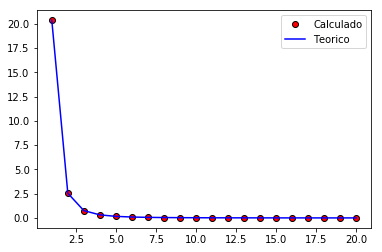

In [14]:
ns = np.arange(1,21)
y = np.zeros(len(ns))
Z = 4

for i,n in enumerate(ns):
    y[i] = np.abs(R1F1(n,0,Z,0)*Yml(0,0,0,0))**2

plt.plot(ns,y,'ro',mec='k',label = 'Calculado')
plt.plot(ns,(Z/ns)**3/np.pi,'b',label = 'Teorico')
plt.legend(loc = 'best')
plt.show()

- Obtuve lo esperado por Openheimmer

# Virial

In [15]:
ur = lambda r: R1F1(1,0,Z,r)*r
Tfunc = lambda r: -0.5*derivative(ur, r, dx=1e-5, n=2)*ur(r)
Vfunc = lambda r: -Z/r*ur(r)**2

In [16]:
T = integrate.quad(Tfunc,0,np.inf)
V = integrate.quad(Vfunc,0,np.inf)
E_1 = T[0]+V[0]
print "Energia =",T[0]+V[0]
print "<V>/<T> =",V[0]/T[0]

Energia = -7.99999997699
<V>/<T> = -1.99999999425


In [17]:
l = 1
ur = lambda r: R1F1(2,l,Z,r)*r
Tfunc = lambda r: (-0.5*derivative(ur, r, dx=1e-5, n=2))*ur(r)+l*(l+1)/(2*r**2)*ur(r)**2
Vfunc = lambda r: (-Z/r)*ur(r)**2

In [66]:
T = integrate.quad(Tfunc,0,np.inf)
V = integrate.quad(Vfunc,0,np.inf)
E_2 = T[0]+V[0]
print "Energia =",T[0]+V[0]
print "<V>/<T> =",V[0]/T[0]

Energia = -1.99999986978
<V>/<T> = -1.99999986978


### Correcciones de estructura fina

In [19]:
Z = 4
E1s = -Z**2/2
E2p = -Z**2/8
alpha = 1/137

# Correccion relativista (pag 198 del BJ)
deltaE_rel_1s = -alpha**2/2*(E1s**2 + 2*Z*E1s*rMean_1s[2][0] + Z**2*rMean_1s[1][0])
deltaE_rel_2p = -alpha**2/2*(E2p**2 + 2*Z*E2p*rMean_2p[2][0] + Z**2*rMean_2p[1][0])

# Correccion Spin-Orbita (pag 199 del BJ)
deltaE_SO_1s = 0 # pues l = 0 -> correccion SO nula
deltaE_SO_2p = alpha**2 * Z/4 * rMean_2p[0][0] * (3/2*(3/2+1) - 1*(1+1) - 3/4)

# Correccion de Darwin (pag 200-201 del BJ)
deltaE_Darwin_1s = np.pi*alpha**2* Z/2 * np.abs((R1F1(1,0,Z,0)*Yml(0,0,0,0)))**2
deltaE_Darwin_2p = np.pi*alpha**2* Z/2 * np.abs((R1F1(2,1,Z,0)*Yml(0,0,0,0)))**2
# deltaE_Darwin_2p = 0, pues si l != 0 la funcion radial es nula en el origen

# Energia Dirac
EDirac = lambda n,j,Z: 137**2*((1+(Z/137/(n-j-0.5+((j+0.5)**2-(Z/137)**2)**0.5))**2)**(-0.5)-1)

EDirac1s = EDirac(1,0.5,4)
EDirac2p = EDirac(2,1.5,4)

[-8.         -8.00852469 -8.00852469 -8.00170494 -8.00170567]


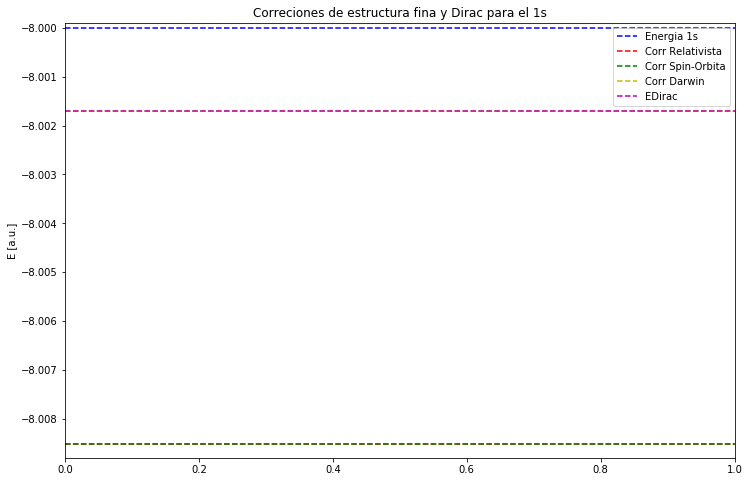

In [20]:
Es = [E1s]
Es.append(Es[-1] + deltaE_rel_1s)
Es.append(Es[-1] + deltaE_SO_1s)
Es.append(Es[-1] + deltaE_Darwin_1s)
Es.append(EDirac1s)
Es = np.array(Es)
colors = list("brgym")
print Es
labs = ["Energia 1s", "Corr Relativista", "Corr Spin-Orbita", "Corr Darwin", "EDirac"]
plt.figure(figsize=(12,8))
for i in range(len(Es)):
    plt.axhline(Es[i],linestyle = 'dashed' ,label = labs[i], color = colors[i])
plt.ylim((-8.0088,-7.9999))
plt.title("Correciones de estructura fina y Dirac para el 1s")
plt.ylabel("E [a.u.]")
plt.legend(loc='best')

[-2.         -2.00024864 -2.00010656 -2.00010656 -2.00010657]


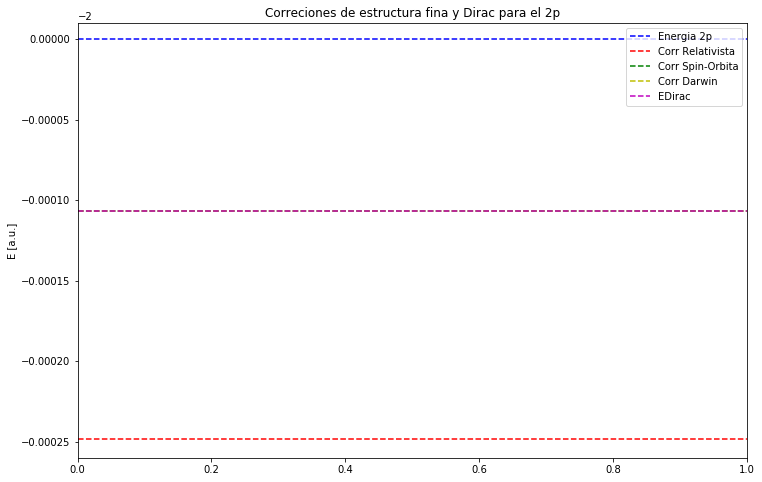

In [21]:
Es = [E2p]
Es.append(Es[-1] + deltaE_rel_2p)
Es.append(Es[-1] + deltaE_SO_2p)
Es.append(Es[-1] + deltaE_Darwin_2p)
Es.append(EDirac2p)
Es = np.array(Es)
colors = list("brgym")
print Es
labs = ["Energia 2p", "Corr Relativista", "Corr Spin-Orbita", "Corr Darwin", "EDirac"]
plt.figure(figsize=(12,8))
for i in range(len(Es)):
    plt.axhline(Es[i], linestyle = 'dashed' ,label = labs[i], color = colors[i])
plt.ylim((-2.00026,-1.99999))
plt.title("Correciones de estructura fina y Dirac para el 2p")
plt.ylabel("E [a.u.]")
plt.legend(loc='best')

# Funcion de onda en otras bases

#### Slater con coeficientes analiticos

In [22]:
def Slater_base(N,ksi,r):
    return (2*ksi)**(N+0.5)*r**(N-1)*np.exp(-ksi*r)/np.sqrt(factorial(2*N))

def Slater_coeff(n,M,l):
    anum = (-1)**(M-1-l)*np.sqrt(factorial(n-l-1)*(factorial(n+l))*factorial(2*M))
    aden = np.sqrt(2*n)*factorial(M-l-1)*factorial(n-M)*factorial(M+l)
    return anum/aden

def Rnl_Slater(n,l,Z,r):
    R = 0
    for M in range(l+1,n+1):
        R = R + Slater_coeff(n,M,l)*Slater_base(M,Z/n,r)
    return R
    

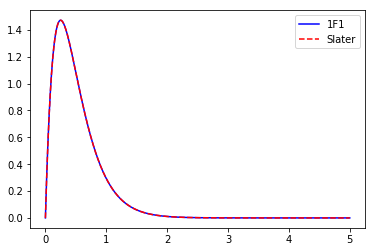

In [23]:
r = np.linspace(0,5,1000)
plt.plot(r, r*R1F1(1,0,4,r), 'b', label="1F1")
plt.plot(r, r*Rnl_Slater(1,0,4,r), 'r--', label='Slater')
plt.legend(loc='best')

# Expansion en Slaters

In [24]:
def Sij_Slater(i,j,alpha):
    return integrate.quad(lambda r: Slater_base(i+1,alpha,r)*Slater_base(j+1,alpha,r),0,np.inf)[0]

def Overlap_Slater(N_Slat,alpha):
    M_overlap = np.zeros((N_Slat,N_Slat))
    for i in range(N_Slat):
        for j in range(i,N_Slat):
            S = Sij_Slater(i,j,alpha)
            M_overlap[i,j] = S
            M_overlap[j,i] = S            
    return M_overlap

# Devuelve los coeficientes de la expansion en Slaters
def Slater_Expansion(n,l,Z,N_Slat):
    S = Overlap_Slater(N_Slat, Z/n)
    B = np.array([integrate.quad(lambda r: R1F1(n,l,Z,r)*Slater_base(i+1,Z/n,r),0,np.inf)[0] for i in range(N_Slat)])
    return np.linalg.solve(S,B)

### Expansion del 1s

In [25]:
n = 1
l = 0
Z = 4
# Cantidad de terminos de la base de Slater a usar
N_Slat = 3

Ci = Slater_Expansion(n,l,Z,N_Slat)
Ci

array([1., 0., 0.])

In [26]:
r = np.linspace(0,3,1000)
wave1s = 0
for i in range(N_Slat):
    wave1s = wave1s + Ci[i]*Slater_base(i+1,Z/n,r)

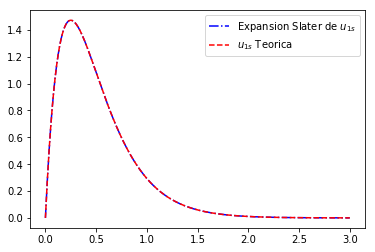

In [27]:
plt.plot(r,r*wave1s,'b-.',label = 'Expansion Slater de $u_{1s}$')
plt.plot(r,r*R1F1(n,l,Z,r), 'r--' ,label = '$u_{1s}$ Teorica')
plt.legend(loc='best')
plt.show()

### Expansion del 2p

In [28]:
n = 2
l = 1
Z = 4
# Cantidad de terminos de la base de Slater a usar
N_Slat = 3

Ci = Slater_Expansion(n,l,Z,N_Slat)
Ci

array([2.22044605e-16, 1.00000000e+00, 6.24500451e-16])

In [29]:
r = np.linspace(0,7,1000)
wave2p = 0
for i in range(N_Slat):
    wave2p = wave2p + Ci[i]*Slater_base(i+1,Z/n,r)

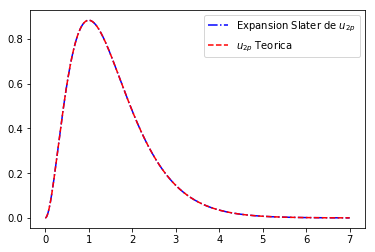

In [30]:
plt.plot(r,r*wave2p,'b-.',label = 'Expansion Slater de $u_{2p}$')
plt.plot(r,r*R1F1(n,l,Z,r), 'r--' ,label = '$u_{2p}$ Teorica')
plt.legend(loc='best')
plt.show()

## Expansion en Laguerre

In [31]:
from scipy.special import eval_genlaguerre

In [32]:
def Laguerre_Base(n,l,Z,r):
    rho = 2*r*Z/n
    return (rho)**l*np.exp(-rho/2)*eval_genlaguerre(n-l-1,2*l+1,rho)

def Laguerre_Expansion(n,l,Z):
    num = integrate.quad(lambda r: R1F1(n,l,Z,r)*Laguerre_Base(n,l,Z,r),0,np.inf)[0]
    den = integrate.quad(lambda r: Laguerre_Base(n,l,Z,r)**2,0,np.inf)[0]
    return num/den

### Expansion 1s

In [33]:
n = 1
l = 0
Z = 4

# Como los Laguere asociados son base ortogonal, solo calculo el coeficiente, que es la normalizacion
C = Laguerre_Expansion(n,l,Z)

In [34]:
r = np.linspace(0,3,1000)
wave1s = C*Laguerre_Base(n,l,Z,r)

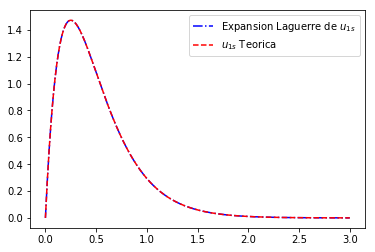

In [35]:
plt.plot(r,r*wave1s,'b-.',label = 'Expansion Laguerre de $u_{1s}$')
plt.plot(r,r*R1F1(n,l,Z,r), 'r--' ,label = '$u_{1s}$ Teorica')
plt.legend(loc='best')
plt.show()

### Expansion 2p

In [36]:
n = 2
l = 1
Z = 4

C = Laguerre_Expansion(n,l,Z)

In [37]:
r = np.linspace(0,7,1000)
wave2p = C*Laguerre_Base(n,l,Z,r)

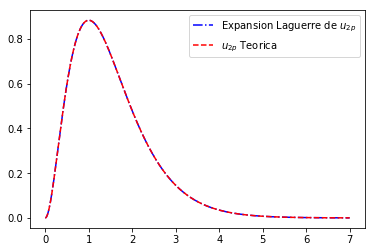

In [38]:
plt.plot(r,r*wave2p,'b-.',label = 'Expansion Laguerre de $u_{2p}$')
plt.plot(r,r*R1F1(n,l,Z,r), 'r--' ,label = '$u_{2p}$ Teorica')
plt.legend(loc='best')
plt.show()

# Soluciones Numericas
### Diferencias finitas (Diagonalizacion)

In [39]:
# usando numpy
def H_matriz(ri,rf,N,Z,l):
    r = np.linspace(ri,rf,N)
    h = (rf-ri)/float(N)
    
    offDiag_der2 = np.ones(len(r)-1)
    diag_cent = l*(l+1)/(2*r**2)
    T_matriz = (np.diag(offDiag_der2,-1) - 2*np.eye(N,dtype=float) + np.diag(offDiag_der2,1))/(-2*h**2) \
                + np.diag(diag_cent)
    
    diag_V = -Z/r
    V_matriz = np.diag(diag_V)
    
    return T_matriz+V_matriz, r

### Solucion para el 1s (n = 1, l = 0, Z = 4)


In [40]:
Z = 4
rmin = 0.001
rmax = 3.2
npuntos = 3000
l = 0
H, r = H_matriz(rmin,rmax,npuntos,Z,l)

In [41]:
# E son las energias, v las respectivas funciones de onda 
# sin normalizar como columnas de una matriz v de autovectores
E, v = eigh(H)
E[np.where(E<0)]

array([-8.00315295, -1.96523371])

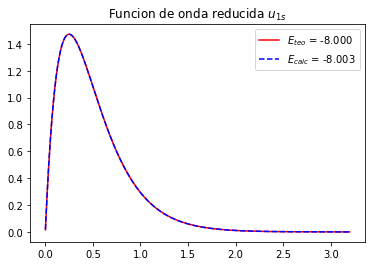

In [42]:
j = 0 # indice que maneja la el autovector a usar
n = 1 # numero cuantico ppal
sgn = -1 # manejo el signo porque a veces dan al reves las cosas

# normalizo las funciones de onda al intervalo que uso
w1s_teo = r*R1F1(n,l,Z,r)/np.sqrt(np.trapz((r*R1F1(n,l,Z,r))**2,r))
w1s_calc = v[:,j]/np.sqrt(np.trapz(v[:,j]**2,r))*sgn
# plotteo
plt.plot(r,w1s_teo,'r',label = '$E_{teo}$'+' = {:.3f}'.format(-Z**2/(2*n**2)))
plt.plot(r,w1s_calc,'b--',label = '$E_{calc}$'+' = {:.3f}'.format(E[j]))
plt.title("Funcion de onda reducida $u_{1s}$")
plt.legend(loc='best')

### Solucion para el 2p (n = 2, l = 1, Z = 4)


In [43]:
Z = 4
rmin = 0.001
rmax = 6
npuntos = 3000
l = 1
H, r = H_matriz(rmin,rmax,npuntos,Z,l)

In [44]:
# E son las energias, v las respectivas funciones de onda 
# sin normalizar como columnas de una matriz v de autovectores
E, v = eigh(H)
E[np.where(E<0)]

array([-1.99955468, -0.87345039, -0.21225942])

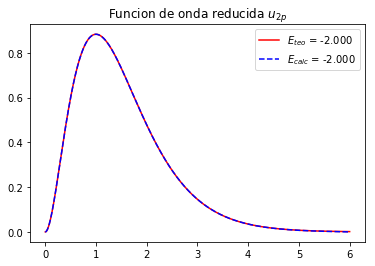

In [45]:
j = 0 # indice que maneja la el autovector a usar
n = 2 # numero cuantico ppal
sgn = -1 # manejo el signo porque a veces dan al reves las cosas

# normalizo las funciones de onda al intervalo que uso
w1s_teo = r*R1F1(n,l,Z,r)/np.sqrt(np.trapz((r*R1F1(n,l,Z,r))**2,r))
w1s_calc = v[:,j]/np.sqrt(np.trapz(v[:,j]**2,r))*sgn
# plotteo
plt.plot(r,w1s_teo,'r',label = '$E_{teo}$'+' = {:.3f}'.format(-Z**2/(2*n**2)))
plt.plot(r,w1s_calc,'b--',label = '$E_{calc}$'+' = {:.3f}'.format(E[j]))
plt.title("Funcion de onda reducida $u_{2p}$")
plt.legend(loc='best')

## Variacional con 4 gaussianos

In [46]:
from scipy.linalg import eigh

In [47]:
def Overlap_ij(alpha,i,j):
    Sij = ( np.pi / (alpha[i] + alpha[j]) )**(1.5)
    return Sij

def Matriz_Overlap(alpha):
    nsize = len(alpha)
    S = np.zeros((nsize,nsize))
    for i in range(0,nsize):
        for j in range(i,nsize):        
            S[i,j]=Overlap_ij(alpha,i,j)
            S[j,i]=S[i,j]
    return S

In [48]:
# Elemento de matriz de cinetica
def Tij(alpha,l,i,j):
    rnum = 3 * np.pi**(1.5) * alpha[i] * alpha[j]
    rden =  (alpha[i] + alpha[j] )**(2.5)    
    Tij = rnum/rden + l*(l+1)/2*np.pi**0.5/(2*(alpha[i]+alpha[j])**0.5)
    return Tij


# Elemento de matriz de potencial
def Vij(alpha,Z,i,j):
    Vij =  Z*( -2*np.pi )  /  (alpha[i] + alpha[j])    
    return Vij

# Matriz del Hamiltoniano en la base
def Matriz_H(alpha,l,Z):
    nsize = len(alpha)
    H = np.zeros((nsize,nsize))
    for i in range(0,nsize):
        for j in range(i,nsize): 
            H[i,j]=Tij(alpha,l,i,j) + Vij(alpha,Z,i,j)
            H[j,i]=H[i,j]
    return H

# 1s Variacional

In [49]:
# Defino los alphas que voy a usar para el exponente de los gaussianos
alpha = np.array([13.00773, 1.962079, 0.444529, 0.1219492])

Z = 4
l = 0

# Genero las matrices de overlap y Hamiltonianos
H = Matriz_H(alpha,l,Z)
S = Matriz_Overlap(alpha)

In [50]:
E,C = eigh(H,S,type=1)
E[np.where(E<0)]

array([-7.64993215, -1.94651165, -0.83248831])

In [51]:
def psi(Ci,Alpha,x):
    nsize = len(Ci) 
    res = 0
    for i in range(0,nsize):
        res = res + Ci[i]*np.exp(-Alpha[i]*x**2)
    return res

In [52]:
# array definitions
npts = 1000
xmin=0.0
xmax=7.0
x = np.linspace(xmin,xmax,npts)
wave1s = np.zeros(npts)
wave2p = np.zeros(npts)

In [53]:
# El autovector es la funcion de onda
C0 = C[:,0]
wave1s = psi(-C0,alpha,x)

# Normalizo
norm_cuad = np.trapz((wave1s*x)**2,x)
wave1s = wave1s/norm_cuad**0.5

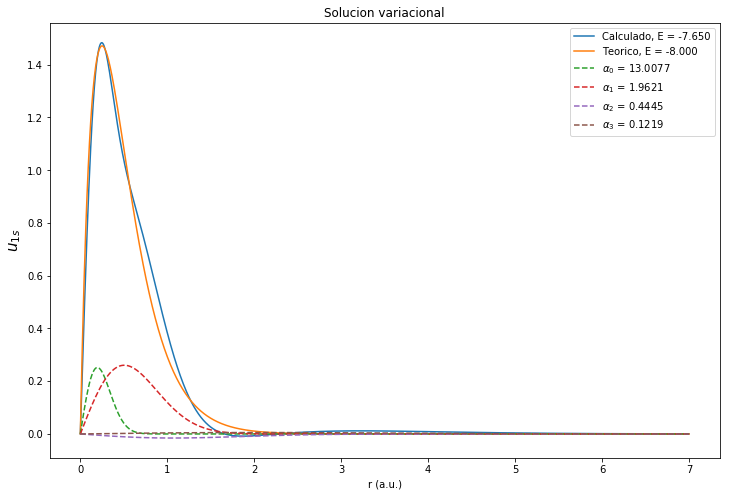

In [54]:
plt.figure(figsize=(12,8))
plt.plot(x,x*wave1s, label = 'Calculado, E = {:.3f}'.format(E[0])); # Normalizo en ese intervalo
plt.plot(x,x*R1F1(1,l,Z,x),label = 'Teorico, E = {:.3f}'.format(-Z**2/(2*1**2)))
plt.title("Solucion variacional");
plt.xlabel("r (a.u.)");
plt.ylabel("$u_{1s}$",size=15);
for i in range(len(alpha)):
    plt.plot(x,x*(-C0[i])*np.exp(-alpha[i]*x**2), label = r'$\alpha_{:d}$ = {:.4f}'.format(i,alpha[i]), linestyle='dashed')
plt.legend(loc='best')

# 2p variacional

In [55]:
# Defino los alphas que voy a usar para el exponente de los gaussianos
alpha = np.array([0.15,0.12,0.1, 0.05, 0.01])

Z = 4
l = 1

# Genero las matrices de overlap y Hamiltonianos
H = Matriz_H(alpha,l,Z)
S = Matriz_Overlap(alpha)

In [56]:
E,C = eigh(H,S,type=1)
E[np.where(E<0)]

array([-2.99058447, -1.02046294, -0.53375585, -0.33587597, -0.1923691 ])

In [57]:
# array definitions
npts = 1000
xmin=0.0
xmax=7.0
x = np.linspace(xmin,xmax,npts)
wave1s = np.zeros(npts)
wave2p = np.zeros(npts)

In [58]:
# El autovector es la funcion de onda
C0 = C[:,0]
wave1s = psi(-C0,alpha,x)

# Normalizo
norm_cuad = np.trapz((wave1s*x)**2,x)
wave1s = wave1s/norm_cuad**0.5

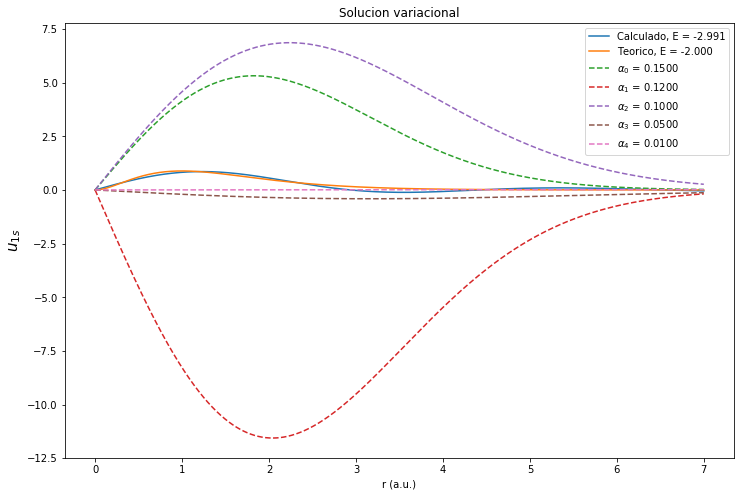

In [59]:
plt.figure(figsize=(12,8))
plt.plot(x,x*wave1s, label = 'Calculado, E = {:.3f}'.format(E[0])); # Normalizo en ese intervalo
plt.plot(x,x*R1F1(2,l,Z,x),label = 'Teorico, E = {:.3f}'.format(-Z**2/(2*2**2)))
plt.title("Solucion variacional");
plt.xlabel("r (a.u.)");
plt.ylabel("$u_{1s}$",size=15);
for i in range(len(alpha)):
    plt.plot(x,x*(-C0[i])*np.exp(-alpha[i]*x**2), label = r'$\alpha_{:d}$ = {:.4f}'.format(i,alpha[i]), linestyle='dashed')
plt.legend(loc='best')

# Solucion Numerica
### Solucion para el 1s

In [60]:
def g(y,x,E):
    l = 0
    Z = 4
    return [y[1],2*(-Z/x+l*(l+1)/(2*x**2)-E)*y[0]]

In [61]:
# Valores iniciales de phi(x) y phi’(x)
initialY = 0,0.01
# Valor tentativo de E
E = -8
Z = 4
l = 0
x = np.linspace(1e-10,3,10000)
# Solucion ecuación diferencial
sol = integrate.odeint(g,initialY,x,(E,))

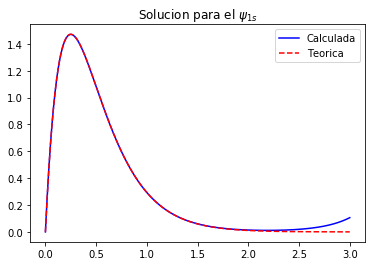

In [62]:
psi = sol[:,0]
psi = psi/np.trapz((psi)**2,x=x)**0.5
# Ploteo de solución
plt.plot(x, psi, color='b',label = 'Calculada')
w1s = x*R1F1(1,0,Z,x)
w1s = w1s/np.trapz(w1s**2,x=x)**0.5
plt.plot(x,w1s,'r--', label = 'Teorica')
plt.legend(loc='best')
plt.title("Solucion para el $\psi_{1s}$")
plt.show()

### Solucion para el 2p

In [63]:
def g(y,x,E):
    l = 1
    Z = 4
    return [y[1],2*(-Z/x+l*(l+1)/(2*x**2)-E)*y[0]]

In [64]:
# Valores iniciales de phi(x) y phi’(x)
initialY = 0,0.0001
# Valor tentativo de E
E = -2
x = np.linspace(1e-5,6,10000)
# Solucion ecuación diferencial
sol = integrate.odeint(g,initialY,x,(E,))

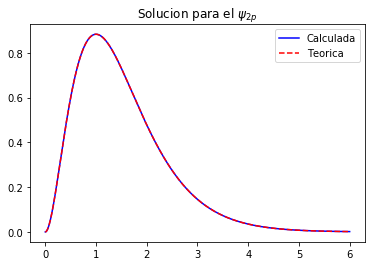

In [65]:
psi = sol[:,0]
psi = psi/np.trapz((psi)**2,x=x)**0.5
# Ploteo de solución
plt.plot(x, psi, color='b',label = 'Calculada')
w1s = x*R1F1(2,1,Z,x)
w1s = w1s/np.trapz(w1s**2,x=x)**0.5
plt.plot(x,w1s,'r--', label = 'Teorica')
plt.legend(loc='best')
plt.title("Solucion para el $\psi_{2p}$")
plt.show()